<a href="https://colab.research.google.com/github/Hani1-2/DeepLearningAssignmnt/blob/master/Ionosphere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models, layers, optimizers
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import io
from google.colab import files
uploaded = files.upload()

Saving ionosphere_data (2).csv to ionosphere_data (2).csv


In [8]:
iono = pd.read_csv(io.BytesIO(uploaded['ionosphere_data (2).csv']))
iono.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


# Checking Missing Values

In [9]:
iono.isna().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [10]:
iono.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
iono['label'] = labelencoder.fit_transform(iono['label'])


In [18]:
iono.drop(columns=['feature2'], inplace=True)

In [19]:
iono.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


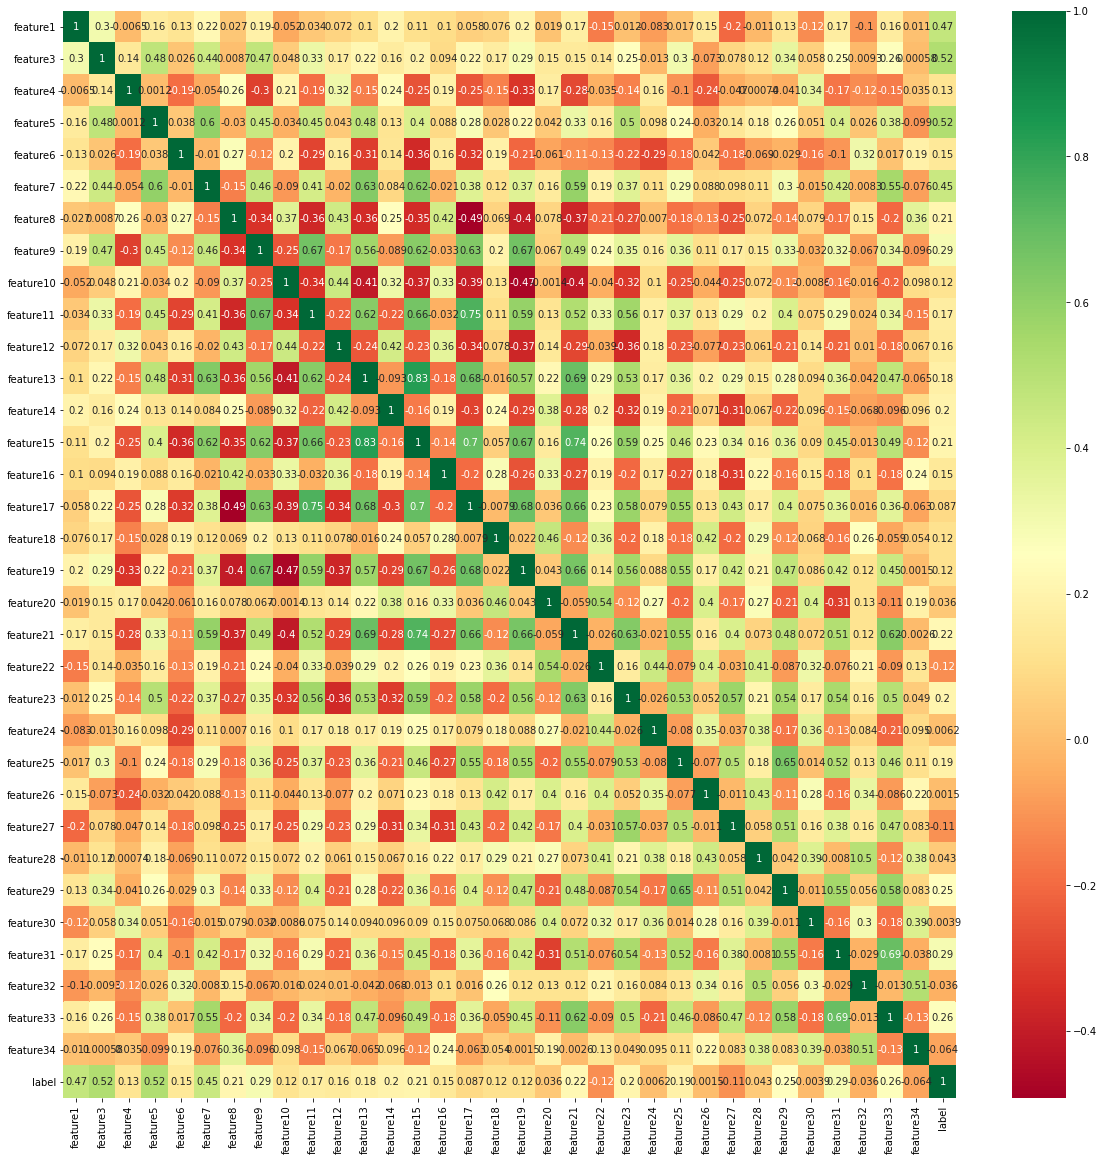

In [20]:
corrmat = iono.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(iono[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [21]:
x = iono.values[:, :-1]
y = iono.values[:, -1]

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=7)

# Build Model

In [37]:
model = models.Sequential() 
model.add(layers.Dense(16,activation='relu', input_shape=(33,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [40]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history=model.fit(x_train, y_train, epochs=100)

Epoch 1/100
9/9 [==============================] - 1s 2ms/step - loss: 0.0215 - acc: 0.9944
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0213 - acc: 0.9973
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0167 - acc: 0.9989
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0171 - acc: 0.9989
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0239 - acc: 0.9965
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0140 - acc: 0.9989
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0136 - acc: 0.9993
Epoch 8/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0400 - acc: 0.9908
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0318 - acc: 0.9939
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0162 - acc: 0.9979
Epoch 11/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0209 

In [41]:
history_dict = history.history
print(history_dict)

{'loss': [0.028092505410313606, 0.025164678692817688, 0.025153031572699547, 0.023870253935456276, 0.02401607483625412, 0.02375299111008644, 0.023819683119654655, 0.022038791328668594, 0.022160960361361504, 0.02224172279238701, 0.022307967767119408, 0.021338846534490585, 0.0216030552983284, 0.021930959075689316, 0.021302156150341034, 0.020220493897795677, 0.021094178780913353, 0.020067205652594566, 0.019715985283255577, 0.02033168077468872, 0.01940504088997841, 0.01855877973139286, 0.018680769950151443, 0.01880660466849804, 0.017858872190117836, 0.018540240824222565, 0.018364956602454185, 0.017570465803146362, 0.016833752393722534, 0.017933787778019905, 0.017500562593340874, 0.017044253647327423, 0.01673102378845215, 0.016835618764162064, 0.016489798203110695, 0.016240693628787994, 0.016035553067922592, 0.01571548916399479, 0.01606304943561554, 0.014808360487222672, 0.015916872769594193, 0.014625588431954384, 0.015124763362109661, 0.014377263374626637, 0.014875943772494793, 0.0146751264

In [44]:
model.predict(x_test)

array([[9.99984086e-01],
       [9.99935865e-01],
       [9.99925971e-01],
       [9.99981463e-01],
       [9.99998569e-01],
       [9.23430443e-01],
       [9.34075356e-01],
       [9.99999881e-01],
       [9.99980688e-01],
       [9.44271445e-01],
       [9.99952495e-01],
       [9.53336179e-01],
       [9.09165276e-09],
       [9.99996781e-01],
       [9.99300838e-01],
       [1.92638975e-22],
       [1.02494504e-23],
       [1.98113966e-07],
       [5.20085052e-07],
       [9.99994516e-01],
       [9.99999166e-01],
       [2.57174888e-05],
       [9.99981284e-01],
       [2.03930094e-14],
       [9.99743998e-01],
       [9.99978185e-01],
       [2.03491747e-02],
       [1.80282593e-02],
       [9.99894738e-01],
       [9.99452949e-01],
       [9.99835789e-01],
       [9.99997616e-01],
       [1.66357043e-12],
       [9.99960303e-01],
       [9.99756813e-01],
       [9.99108434e-01],
       [9.99999881e-01],
       [9.98159170e-01],
       [9.99999404e-01],
       [1.02596801e-04],
